### En este ejercicio crearás un programa de Python que determine si un proyectil lanzado desde cierta altitud h sobre la superficie de la Tierra permanecería o no en una orbita circular dependiendo de su velocidad inicial. Luego realizarás un experimiento aleatorio para determinar la probabilidad de que un proyectil quede atrapado en orbita circular al ser lanzado a cierta altitud.

a)  Crea una función "Fg" que calcule la fuerza gravitacional ejercida sobre el proyectil al momento de ponerse en orbita. Las entradas de la función son:  la masa del proyectil en kilogramos $m$ y la altitud a la cual desea ponerse en órbita al proyectil $h$.  

 b) Crea otra función "Fc" que calcule la fuerza centrípeta que produce el cambio de dirección de la velocidad del proyectil viajando en su orbita circular cuyas entradas sean: la masa del proyectil "m", la velocidad inicial del proyectil en m/s "v" y la altitud de la órbita "h".

 c) Crea un diccionario D en el cual se almacenen arreglos en que se registren los datos (m,v,h) de un conjunto de 5 proyectiles cuyas etiquetas sean "masa", "velocidad" y "altitud" respectivamente. Crea dos nuevas entradas correspondientes a la fuerza gravitacional y a la fuerza centripeta de cada proyectil a partir de las funciones Fg y Fc que creaste antes. A partir de D construye un data frame de pandas, en lo que sigue manipularas los datos usando este objeto en vez del diccionario.   

d) Comparando los valores de las últimas columnas, introduce al data frame una nueva columna con entradas boleanas y con etiqueta "mascara" en la cual se registre con False y True dependiendo de si para cada proyectil del conjunto
se satisface la condición de que: $$abs(Fc-Fg)<\epsilon$$ donde $\epsilon$ esta asociado con la incertidumbre de los aparatos de medición disponibles. Supongamos que la anterior condición determina si el proyectil permanece en órbita circular o no.

 e) Utiliza la máscara para intercambiar las entradas de D['velocidad'] correspondientes a los proyectiles que no quedaron en órbita de acuerdo al resultado del inciso anterior por los valores de la velocidad  requerida para lo contrario. ¿Se cumple que todos los satelites están en órbita? ¿Porqué?

 f) Ahora vas a hacer un experimento aleatorio usando la computadora. Considera que lanzas N (al inicio escribe y prueba el programa con un número pequeño) proyectiles con m = 100 kg a diferentes valores aleatorios de la  altitud y  rapidez inicial dentro de los siguientes rangos

$$h \in (2000,36000) \mathrm{km}$$

$$v \in (1000,10000) \mathrm{m/s}$$

  * f.1) Genera  el diccionario de datos correspondiente, con las mismas entradas que en el inciso  c) excepto la masa.
  *  f.2) Calcula el cociente siguiente:
  
$$P = \frac{N_{orbita}}{N}$$

  donde $N_{orbita}$ es el número de proyectiles en la muestra que quedaron en órbita.
   
  *  f.3) Has el experimiento para diferentes valores de $N>1000$ y observa si el valor de P converge a un valor aproximadamente constante conforme N crece. En tal caso P sería aproximadamente la probabilidad de que un proyectil quede en orbita.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as con
from pandas import Series, DataFrame

### Inciso a)

 Se debe crea una función "Fg" que calcule la fuerza gravitacional ejercida sobre un proyectil al momento de ponerse en orbita. Las entradas de la función correspondientes a cada proyectil son: la masa del proyectil en kilogramos m y la altitud a la cual desea ponerse en órbita al proyectil h.

In [ ]:
def Fg(m,h):
    G = con.G #Constante Gravitacional,en esta usamos la libreria scipy.constants para obtener su valor
    Mt = 5.9742e+24 #Masa de la tierra en Kilogramos
    R = 6378100 #Radio de la tierra en metros
    return int(G*Mt*m/((R+h)**2))

Fg = np.vectorize(Fg) #se utiliza para vectorizar funciones escalares, es decir, para aplicar una función a cada elemento de un array

### Inciso b)

 Se crea otra función "Fc" que calcule la fuerza centrípeta que produce el cambio de dirección de la velocidad del proyectil viajando en su orbita circular cuyas entradas sean: la masa del proyectil "m", la velocidad inicial del proyectil en m/s "v" y la altitud de la órbita "h".

In [ ]:
def Fc(m,h,v):
    R = 6378100 #Radio de la tierra en metros
    return int(m*v**2/(R+h))

Fc = np.vectorize(Fc) #se utiliza para vectorizar funciones escalares, es decir, para aplicar una función a cada elemento de un array

### Inciso c)

 Para este inciso primero crearemos un diccionario D en el cual se almacenen arreglos en que se registran los datos (m,v,h) de un conjunto de 5 proyectiles cuyas etiquetas sean "masa", "velocidad" y "altitud" respectivamente.

In [ ]:
rng=np.random.default_rng() # Es una función del paquete NumPy que devuelve un objeto generador de números aleatorios

D={"masa":rng.integers(low=10,high=50,size=5),"velocidad":rng.integers(low=3e3,high=7e3,size=5),"altitud":rng.integers(low=2e6,high=35e6,size=5)} #Esta línea de código crea un diccionario llamado D. El diccionario tiene tres claves: "masa", "velocidad" y "altitud". Cada una de estas claves está asociada a un array NumPy de números enteros generados aleatoriamente.

   # "masa": rng.integers(low=10, high=50, size=5): Genera un array de 5 números enteros aleatorios en el rango [10, 50) utilizando el método integers() del generador rng. El parámetro low especifica el límite inferior del rango (inclusive), high especifica el límite superior del rango (exclusivo) y size especifica el tamaño del array resultante.

   # "velocidad": rng.integers(low=3e3, high=7e3, size=5): Similar al anterior, pero en este caso genera un array de 5 números enteros aleatorios en el rango [3000, 7000).

   # "altitud": rng.integers(low=2e6, high=35e6, size=5): Genera un array de 5 números enteros aleatorios en el rango [2000000, 35000000).

Ahora creamos dos nuevas entradas correspondientes a la fuerza gravitacional y la fuerza centrípeta de cada proyecto a partir de las funciones Fg y Fc que se crearon antes.

In [ ]:
D["Fg"]=Fg(D["masa"],D["altitud"])
D["Fg"]

array([20,  8, 11, 49,  3])

In [ ]:
D["Fc"]=Fc(D["masa"],D["altitud"],D["velocidad"])
D["Fc"]

array([30, 23, 39, 26, 13])

A partir de D construimos un data frame de pandas para que después manipulemos los datos usando este objeto en vez del diccionario.

In [ ]:
df = pd.DataFrame(D)
df

,masa,velocidad,altitud,Fg,Fc
0,14,6046,10185797,20,30
1,22,5849,26261206,8,23
2,31,6453,26296462,11,39
3,44,3348,12446080,49,26
4,12,6369,30123939,3,13


### Inciso d )

Para este inciso se debe usar los valores de $F_c$ y $F_g$ para saber si el proyectil quedó en órbita. Es decir, para que el proyectil quede en orbita se debe de cumplir que $abs(Fc-Fg)$ sea menor que $\epsilon$.

El primer paso para resolver el problema es calcular $ϵ$. El inciso comenta que $\epsilon$ depende de las incertidumbres de los aparatos de medición disponibles. Para conocer la incertidumbre de una función que depende de variables con incertidumbres propias se tienen las siguientes formulas:

Para el producto y división

$$\left(\frac{\Delta f}{f}\right)^2 = \left(\frac{\Delta x}{x}\right) ^2 + \left(\frac{\Delta y}{y}\right)^2$$

De modo que

$$\left(\frac{\Delta f}{f}\right)^2 = \left[\left(\frac{\Delta x}{x}\right) ^2 + \left(\frac{\Delta y}{y}\right)^2 \right]$$

Para la adición

$$(\Delta f )^2 = (\Delta x)^2 + (\Delta y)^2 $$



Con esto, dadas las incertidumbres de los aparatos de medición, podemos calcular las incertidumbres de los valores calculados para $F_c$ y $F_g$.

Suponiendo que solo se tiene incertidumbres para la masa, altitud y velocidad, se crea una funcion que acepta los parametros de los valores de la variable junto con su respectiva incertidumbre.




In [ ]:
def Δf(f, Δx, x, Δy, y, Δz=0, z=1):
    return np.sum(np.sqrt((Δx / x)**2 + (Δy / y)**2 + (Δz / z)**2)) * f
Δf = np.vectorize(Δf, excluded=[1, 3, 5])

In [ ]:

Δm = 5
Δh = 8.25e6
Δv = 250


Δf_g = Δf(df['Fg'], Δm, df['masa'], Δh, df['altitud'])
Δf_c = Δf(df['Fc'], Δm, df['masa'], Δh, df['altitud'], Δv, df['velocidad'])

ϵ = np.sqrt(Δf_g**2 + Δf_c**2)

df['mascara'] = np.abs(df['Fg'] - df['Fc']) < ϵ
df

,masa,velocidad,altitud,Fg,Fc,mascara
0,14,6046,10185797,20,30,True
1,22,5849,26261206,8,23,False
2,31,6453,26296462,11,39,False
3,44,3348,12446080,49,26,True
4,12,6369,30123939,3,13,False


### Inciso e)

En este inciso nos enfocaremos en intercambiar los datos de las velocidades de nuestro DataFrame que no cumplan con la condición dada en el inciso anterior, es decir, las velocidades de los proyectiles que no quedaron en órbita serán reemplazadas por nuevas velocidades que verifiquen la condición.

Lo primero será crear una función que nos de la velocidad necesaria para que los proyectiles se encuentren en órbita. Dicha ecuación se puede obtener al igualar la fuerza gravitacional y la fuerza centrípeta, como se mostrará enseguida.

$$Fg=Fc$$
$$\frac{-GM_t m}{(R+h)^2} = \frac{-m v^2}{(R+h)}$$

Resolviendo para v, resulta en lo siguiente:

$$v=\sqrt{\frac{GM_t}{R+h}}$$

Así como en el inciso pasado, vectorizamos la función con el fin de que esta se aplique a los elementos de un arreglo.

Lo siguiente es reemplazar las velocidades del DataFrame que no cumplan con la condición (con valores falsos), por las nuevas velocidades de órbita.


```
 df['velocidad'][df['mascara'] == False] = Vo(df['altitud'])
```
En nuestro código, tomamos de la columna de nuestro dataframe con nombre "velocidad" los proyectiles que tengan valor falso dentro de la columna con nombre "máscara" y condicionamos a que esas velocidades tomen los valores de la nueva función.
A continuación, se muestra un diagrama que ilustra el proceso que se siguió. Se seleccionaron las columnas iluminadas con color naranja que tienen como valor en la máscara falso y a esto valores de la velocidad se les aplicó la función de la velocidad de órbita.

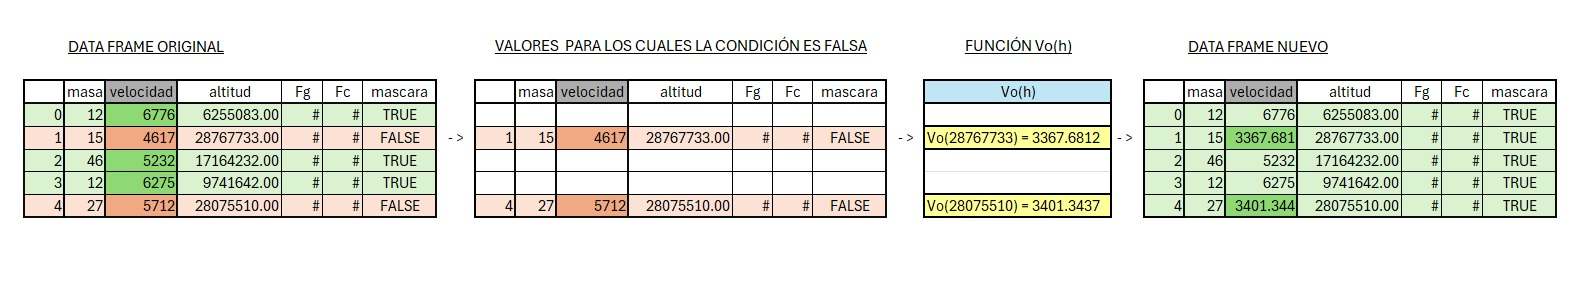



In [ ]:
def Vo(h):
    G = con.G
    Mt = 5.9742e+24
    R = 6378100.
    return np.sqrt(G*Mt/(R+h))

Vo = np.vectorize(Vo)

df['velocidad'][df['mascara'] == False] = Vo(df['altitud'])

df

<ipython-input-11-8a4f2f11bacb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['velocidad'][df['mascara'] == False] = Vo(df['altitud'])


,masa,velocidad,altitud,Fg,Fc,mascara
0,14,6046.000000,10185797,20,30,True
1,22,3495.202019,26261206,8,23,False
2,31,3493.315841,26296462,11,39,False
3,44,3348.000000,12446080,49,26,True
4,12,3305.096758,30123939,3,13,False


Al imprimir el DataFrame, notamos que a pesar de haber reemplazado los valores de la velocidad nos sigue arrojando valores falsos. Por ello, es necesario evaluar la fuerza centrípeta, el valor epsilon y la máscara para comprobar que las nuevas velocidades nos arrojen un valor verdadero.

Como punto a notar, no se evalúa el valor de la fuerza gravitacional pues esta no depende de las velocidades de órbita.

In [ ]:
# Calculando nuevamente la fuerza centripeta
df['Fc'] = Fc(df['masa'], df['altitud'], df['velocidad'])

# Calculando la incertidumbre de la fuerza centripeta
Δf_c = Δf(df['Fc'], Δm, df['masa'], Δh, df['altitud'], Δv, df['velocidad'])

# Calculando nuevamente epsilon
ϵ = np.sqrt(Δf_g**2 + Δf_c**2)

# Calculando nuevamente la mascara
df['mascara'] = np.abs(df['Fc'] - df['Fg']) < ϵ

df

,masa,velocidad,altitud,Fg,Fc,mascara
0,14,6046.000000,10185797,20,30,True
1,22,3495.202019,26261206,8,8,True
2,31,3493.315841,26296462,11,11,True
3,44,3348.000000,12446080,49,26,True
4,12,3305.096758,30123939,3,3,True


### Inciso f)

En este inciso se creara una funcion que nos devuelva la probabilidad de que un proyectil co una masa de $100 kg$ se quede en orbita respecto al número de lanzamientos.

Para esto asignaremos velocidades y altitudes aleatorias a cada uno de ellos usando la funcion:

```
rng = np.random.default_rng()
```
La cual aplicamos de la forma:

```
velocidades = rng.integers(low=min, high=max, size=N)
altitudes = rng.integers(low=min, high=max, size=N)
```
En donde min es el valor minimo del rango de velocidades, max es el valor maximo del rango y N es el numero de intervalos en lo que se divide el rango, esto mismo se aplica para las altitudes.

Una vez hecho esto creamos un diccionario con las entradas 'Velocidad',
 'Altitud', 'F Gravitacional' y 'F Centripeta'.


```
dat={'Velocidad':velocidad, 'Altitud': altitud ,'F Gravitacional':Fg(Masa, altitud),'F Centripeta':Fc(Masa, velocidad, altitud)}
```

Estas dos ultimas usando las funciones:

$$Fg=\frac{-GM_t m}{(R+h)^2}$$


```
Fg(m,h)
```

$$Fc= \frac{-m v^2}{(R+h)}$$


```
Fc(m,v,h)
```

Definidas en el inciso a).

Posteriormente creamos un data frame con los datos de el diccionario dat.


```
datos=pd.DataFrame(dat)
```

Ahora, para determinar si el proyectil queda en orbita veremos si culple la condicion $abs(Fc-Fg) < ϵ $, con lo cual usaremos el mismo procedimiento que se utilizo en el inciso d).

Una vez aplicada la mascara, calculamos la probabilidad de que un proyectil quede en orbita.

$$Probabilidad = \frac{N_{orbita}}{N}$$


```
return len(datos[datos['Mascara']==True])/N
```








In [ ]:
def prob(N):
  """
  Funcion de probabilidad respecto al número de lanzamientos
  """
  #Parámetros
  Masa = 100

  #Función generadora de un arreglo de números aleatorios.
  rng = np.random.default_rng()

  #Arreglo de números aleatrorios entre el numero low='' y high='' de magnitud N.
  velocidad = rng.integers(low=1e3, high=1e4, size=N)
  altitud = rng.integers(low=2e6, high=36e6, size=N)


  #Diccionario
  dat={'Velocidad':velocidad, 'Altitud': altitud ,'F Gravitacional':Fg(Masa, altitud),'F Centripeta':Fc(Masa, velocidad, altitud)}

  #Data Frame en Pandas creado a partir de las entradas del Diccionario
  datos=pd.DataFrame(dat)

  #Determina si el proyectil cumple la condicion para quedar en orbita
  Δm = 5
  Δh = 8.25e6
  Δv = 250

  Δf_g = Δf(datos['F Gravitacional'], Δm, np.ones(N)*Masa, Δh, datos['Altitud'])
  Δf_c = Δf(datos['F Centripeta'], Δm, np.ones(N)*Masa, Δh, datos['Altitud'],Δv, datos['Velocidad'])

  ϵ = np.sqrt(Δf_g**2 + Δf_c**2)

  #Aplica la "Mascara"
  datos['Mascara'] = np.abs(datos['F Centripeta'] - datos['F Gravitacional']) < ϵ

  #Calcula la probabilidad de que un proyectil quede en orbita
  return len(datos[datos['Mascara']==True])/N

Calculamos la probabilidad para 1000 lanzamientos.

In [ ]:
prob(1000)

0.184

####Realizando el experimento para cinco valores de N en el rango [1000 , 1 000 000]

In [ ]:
valN=np.linspace(1e3,1e6,5)

i=0
valprob=[]

while i <len(valN):
  valprob.append(prob(int(valN[i])))
  i+=1

exp = {'Numero de lanzamientos' : valN , 'Probabilidad' : valprob}
exper = pd.DataFrame(exp)
exper


,Numero de lanzamientos,Probabilidad
0,1000.0,0.200000
1,250750.0,0.184694
2,500500.0,0.184603
3,750250.0,0.184548
4,1000000.0,0.185000
